# Serverless Data Prep with Glue Interactive Sessions (from `SageMaker Studio`)

This notebook demonstrates the ability to use Apache Spark using AWS Glue to do data prep with two different datasets in order to build an urban air quality predictor with Amazon SageMaker.

![Intro](img/img1.png)


# Introduction

While some organizations see data science, data engineering, and data analytics as separate siloed functions, we're increasingly seeing with many of our customers that data prep and analytics are foundational components of ML workflows.

For example, although organizations have data engineering teams to clean and prepare data for analytics and ML, the specific data that a data scientist may need for training a specific model may not be available in the repository of data that a data engineering team may have prepared.

![Intro](img/img2.png)

# Problem Statement

Lets take a problem and try to solve it. As we all know, Air pollution in cities can be an acute problem leading to damaging effects on people, animals, plants and property.

We need to build a machine learning model which can help to predict the amount of NO2 in the area based on weather conditions

So, ultimately we would like to have a ML model, wherein we are going to feed the weather details of a particular city at a given time, These details would be, mean temperature, maximum temperature, minimum temperate and so on.

And the Model should predict the NO2 or nitrogen dioxide concentration levels at that time.

![Intro](img/img3.png)


# Dataset

For this demo we would use the following dataset:

- [OpenAQ physical air quality data](https://registry.opendata.aws/openaq/) : Global, aggregated physical air quality data from public data sources provided by government, research-grade and other sources.
    42GB of Data

- [NOAA Global Surface Summary of Day](https://registry.opendata.aws/noaa-gsod/) : Global summary of day data for 18 surface meteorological elements are derived from the synoptic/hourly observations contained in USAF DATSAV3 Surface data and Federal Climate Complex Integrated Surface Hourly (ISH).

# Lets get started

In [3]:
%stop_session

Welcome to the Glue Interactive Sessions Kernel
For more information on available magic commands, please type %help in any new cell.

Please view our Getting Started page to access the most up-to-date information on the Interactive Sessions kernel: https://docs.aws.amazon.com/glue/latest/dg/interactive-sessions.html
It looks like there is a newer version of the kernel available. The latest version is 0.38.1 and you have 0.37.4 installed.
Please run `pip install --upgrade aws-glue-sessions` to upgrade your kernel
There is no current session.


In [5]:
%help


# Available Magic Commands

## Sessions Magic

----
    %help                             Return a list of descriptions and input types for all magic commands. 
    %profile            String        Specify a profile in your aws configuration to use as the credentials provider.
    %region             String        Specify the AWS region in which to initialize a session. 
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\ USERNAME \.aws\config" on Windows.
    %idle_timeout       Int           The number of minutes of inactivity after which a session will timeout. 
                                      Default: 2880 minutes (48 hours).
    %session_id_prefix  String        Define a String that will precede all session IDs in the format 
                                      [session_id_prefix]-[session_id]. If a session ID is not provided,
                                      a random UUID will be generated.
    %status                           Returns the status of the current Glue session including its duration, 
                                      configuration and executing user / role.
    %session_id                       Returns the session ID for the running session. 
    %list_sessions                    Lists all currently running sessions by ID.
    %stop_session                     Stops the current session.
    %glue_version       String        The version of Glue to be used by this session. 
                                      Currently, the only valid options are 2.0 and 3.0. 
                                      Default: 2.0.
----

## Selecting Job Types

----
    %streaming          String        Sets the session type to Glue Streaming.
    %etl                String        Sets the session type to Glue ETL.
    %glue_ray           String        Sets the session type to Glue Ray.
----

## Glue Config Magic 
*(common across all job types)*

----

    %%configure         Dictionary    A json-formatted dictionary consisting of all configuration parameters for 
                                      a session. Each parameter can be specified here or through individual magics.
    %iam_role           String        Specify an IAM role ARN to execute your session with.
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\%USERNAME%\.aws\config` on Windows.
    %number_of_workers  int           The number of workers of a defined worker_type that are allocated 
                                      when a session runs.
                                      Default: 5.
    %additional_python_modules  List  Comma separated list of additional Python modules to include in your cluster 
                                      (can be from Pypi or S3).
----

                                      
## Magic for Spark Jobs (ETL & Streaming)

----
    %worker_type        String        Set the type of instances the session will use as workers. 
                                      ETL and Streaming support G.1X, G.2X, G.4X and G.8X. 
                                      Default: G.1X.
    %connections        List          Specify a comma separated list of connections to use in the session.
    %extra_py_files     List          Comma separated list of additional Python files From S3.
    %extra_jars         List          Comma separated list of additional Jars to include in the cluster.
    %spark_conf         String        Specify custom spark configurations for your session. 
                                      E.g. %spark_conf spark.serializer=org.apache.spark.serializer.KryoSerializer
----
                                      
## Magic for Ray Job

----
    %min_workers        Int           The minimum number of workers that are allocated to a Ray job. 
                                      Default: 1.
    %object_memory_head Int           The percentage of free memory on the instance head node after a warm start. 
                                      Minimum: 0. Maximum: 100.
    %object_memory_worker Int         The percentage of free memory on the instance worker nodes after a warm start. 
                                      Minimum: 0. Maximum: 100.
----

## Action Magic

----

    %%sql               String        Run SQL code. All lines after the initial %%sql magic will be passed
                                      as part of the SQL code.  
----



In [11]:
%session_id_prefix my-smgluedemo
%glue_version 3.0
%number_of_workers 50
%idle_timeout 600
%additional_python_modules sagemaker

Setting session ID prefix to my-smgluedemo
Setting Glue version to: 3.0
Previous number of workers: 5
Setting new number of workers to: 50
Current idle_timeout is 2880 minutes.
idle_timeout has been set to 600 minutes.
Additional python modules to be included:
sagemaker


In [1]:
print(spark.version)

Authenticating with environment variables and user-defined glue_role_arn: arn:aws:iam::507922848584:role/service-role/SageMaker-myRoleforSMStudio
Trying to create a Glue session for the kernel.
Worker Type: G.1X
Number of Workers: 50
Session ID: my-smgluedemo-e3dccbcf-b014-4e17-a37b-25ca1090ed04
Job Type: glueetl
Applying the following default arguments:
--glue_kernel_version 0.37.4
--enable-glue-datacatalog true
--additional-python-modules sagemaker
Waiting for session my-smgluedemo-e3dccbcf-b014-4e17-a37b-25ca1090ed04 to get into ready status...
Session my-smgluedemo-e3dccbcf-b014-4e17-a37b-25ca1090ed04 has been created.
3.1.1-amzn-0


# Part 1: Data preparation and cleaning using Spark 

## 1.1 Data preparation and cleaning of the `first` dataset (NO2 Air Quality)

In the cells below, we're going to perform the following operations:

- Use Spark to read our data from the `OpenAQ` S3 Bucket.
- Filter the available data to `Boston` and `NO2 readings` (indicative of air quality).
- Group the readings by day.

In [2]:
df = spark.read.json("s3://openaq-fetches/realtime-gzipped/2022-01-05/1641409725.ndjson.gz")
df2 = spark.read.schema(df.schema).json("s3://openaq-fetches/realtime-gzipped/202*")

df2.show(2, truncate=True)

+--------------------+---------------+------------------+--------------------+-------+--------------------+--------+------+---------+-----------+----------+-----+-----+
|         attribution|averagingPeriod|              city|         coordinates|country|                date|location|mobile|parameter| sourceName|sourceType| unit|value|
+--------------------+---------------+------------------+--------------------+-------+--------------------+--------+------+---------+-----------+----------+-----+-----+
|[{EEA, http://www...|   {hours, 1.0}|Escaldes-Engordany|{42.5096939994651...|     AD|{2023-02-21T02:00...| AD0942A| false|     pm10|EEA Andorra|government|µg/m³| 18.0|
|[{EEA, http://www...|   {hours, 1.0}|Escaldes-Engordany|{42.5096939994651...|     AD|{2023-02-21T03:00...| AD0942A| false|     pm10|EEA Andorra|government|µg/m³| 20.0|
+--------------------+---------------+------------------+--------------------+-------+--------------------+--------+------+---------+-----------+----------

In [3]:
import pyspark.sql.functions as F

'''
Filtering Data ONLY for 
    City      : Boston
    Parameter : no2

Adding a new Column 'YEAR'    
'''
dfBos = df2.filter(F.lower((df2.city)) \
           .contains('boston')) \
           .filter(df2.parameter == "no2") \
           .withColumn("year", F.substring(df2.date.utc, 1, 4)) \
           .cache()

dfBos.show(5, truncate=True)

+--------------------+---------------+--------------------+--------------------+-------+--------------------+--------------------+------+---------+----------+----------+----+------+----+
|         attribution|averagingPeriod|                city|         coordinates|country|                date|            location|mobile|parameter|sourceName|sourceType|unit| value|year|
+--------------------+---------------+--------------------+--------------------+-------+--------------------+--------------------+------+---------+----------+----------+----+------+----+
|[{US EPA AirNow, ...|   {hours, 1.0}|Boston-Cambridge-...|{42.474701, -70.9...|     US|{2023-04-05T17:00...|                LYNN| false|      no2|    AirNow|government| ppm|0.0024|2023|
|[{US EPA AirNow, ...|   {hours, 1.0}|Boston-Cambridge-...|{42.2117, -71.114...|     US|{2023-04-05T17:00...|E. Milton - Blue Hil| false|      no2|    AirNow|government| ppm| 0.002|2023|
|[{US EPA AirNow, ...|   {hours, 1.0}|Boston-Cambridge-...|{42.34

In [4]:
'''
Aggregating the data day wise by taking the average of `no2` value across each day. 
Reducing the no. of data points from ~2.5M to ~ 2K 
'''

dfNoAvg = (dfBos.withColumn("ymd", F.to_date(dfBos.date.utc)) 
                .groupBy("ymd") 
                .avg("value") 
                .withColumnRenamed("avg(value)", "no2_avg")
          )

dfNoAvg.show(10, truncate=True)

+----------+--------------------+
|       ymd|             no2_avg|
+----------+--------------------+
|2022-05-31|0.005007751937984496|
|2021-11-10|0.010848101265822781|
|2021-03-31|0.005881355932203...|
|2022-12-04|0.003643782837127...|
|2021-12-13|0.010462264150943394|
|2021-11-23|0.004562500000000002|
|2023-02-23|0.009197023809523804|
|2020-04-12| 0.00452808988764045|
|2020-07-14|0.005851851851851853|
|2020-12-26|0.003088235294117...|
+----------+--------------------+
only showing top 10 rows


In [5]:
import pyspark.sql.functions as F

year_min = dfNoAvg.select(F.year("ymd").alias("year")).agg({'year':'min'}).first()[0]
year_max = dfNoAvg.select(F.year("ymd").alias("year")).agg({'year':'max'}).first()[0]

(year_min, year_max)

(2019, 2023)


## 1.2 Data preparation and cleaning of the `second` dataset (Weather )


Now that our first dataset looks good, we used the **year_min** and **year_max**  variables to limit the data we want to read from the second dataset.


### And now the weather

In [6]:
from pyspark.sql.types import DoubleType
from pyspark.sql import functions as F

# Boston, MA, USA
longLeft, latBottom, longRight, latTop = [-71.191162,42.227087,-70.986022,42.397057]

dfSchema = spark.read.csv("s3://noaa-gsod-pds/2022/32509099999.csv", header=True, inferSchema=True)

# We read our first year, then union the rest of the years :)
def read_year(year):
    return spark.read.csv(f"s3://noaa-gsod-pds/{year}/", header=True, schema=dfSchema.schema)

year_range = range(int(year_min), int(year_max)+1)
df = read_year(year_range[0])
for year in year_range[1:]:
    df = df.union(read_year(year))

df = df \
        .withColumn('LATITUDE', df.LATITUDE.cast(DoubleType())) \
        .withColumn('LONGITUDE', df.LONGITUDE.cast(DoubleType()))

bostondf = df \
        .filter(df.LATITUDE >= latBottom) \
        .filter(df.LATITUDE <= latTop) \
        .filter(df.LONGITUDE >= longLeft) \
        .filter(df.LONGITUDE <= longRight)

# Rename columns so they're easier to read
bostonfeatures = bostondf.selectExpr("Date as date", "MAX as temp_max", "MIN as temp_min", "WDSP as wind_avg", "SLP as pressure_sea_level", "STP as pressure_station")

# Remove invalid readings
no_data_mappings = [
    ["temp_max", 9999.9],
    ["temp_min", 9999.9],
    ["wind_avg", 999.9],
    ["pressure_sea_level", 9999.9],
    ["pressure_station", 9999.9]
]

for [name, val] in no_data_mappings:
    bostonfeatures = bostonfeatures \
                        .withColumn(name, F.when(F.col(name)==val, None) \
                                           .otherwise(F.col(name)))
    
# Now average each reading per day
bostonfeatures = bostonfeatures \
                    .groupBy("date") \
                    .agg(*[F.mean(c).alias(c) for c in bostonfeatures.columns[1:]])

bostonfeatures = bostonfeatures.withColumn("date", F.to_date(F.col("date"), "yyyy-MM-dd"))
bostonfeatures_pd = bostonfeatures.toPandas()

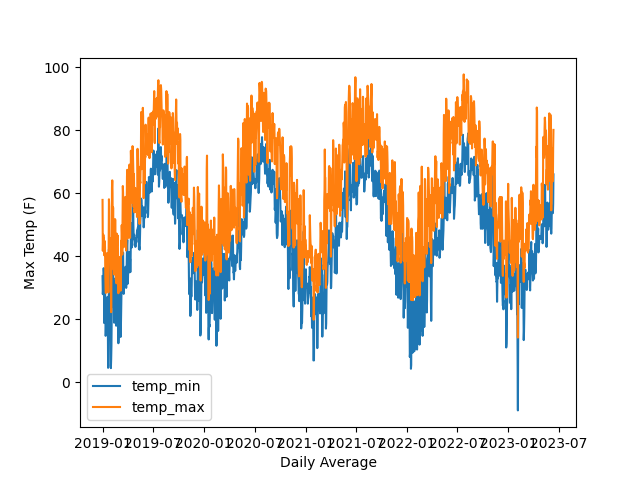

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bostonfeatures_pd.plot(x='date', y=['temp_min', 'temp_max'])
plt.ylabel('Max Temp (F)')
plt.xlabel('Daily Average')
plt.show()


%matplot plt

## 1.3. Marry the `two processed data` and make it ready for the `ML training`

Now that we've taken a quick look at our data and done some initial exploration for both the dataset, let's merge the two datasets.

In [8]:
# First Dataset - NO2 Dataset
dfNoAvg.show(5)

+----------+--------------------+
|       ymd|             no2_avg|
+----------+--------------------+
|2021-11-10|0.010848101265822781|
|2022-05-31|0.005007751937984497|
|2021-12-13|0.010462264150943394|
|2022-12-04|0.003643782837127...|
|2020-01-16|0.014250000000000002|
+----------+--------------------+
only showing top 5 rows


In [9]:
# Second Dataset - Weather Dataset 
bostonfeatures.show(5)

+----------+--------+------------------+--------+------------------+----------------+
|      date|temp_max|          temp_min|wind_avg|pressure_sea_level|pressure_station|
+----------+--------+------------------+--------+------------------+----------------+
|2023-04-18|   57.85|              48.8|    10.3|           1003.55|           501.3|
|2022-03-18|    68.1|42.349999999999994|     4.7|            1013.3|          506.15|
|2022-06-02|    63.0|              54.0|     7.1|            1009.2|             8.2|
|2021-05-19|    80.5|              61.5|    4.45|           1023.65|           511.4|
|2021-06-20|   87.85|              69.1|     4.7|            1006.8|           503.0|
+----------+--------+------------------+--------+------------------+----------------+
only showing top 5 rows


In [10]:
merged_df = dfNoAvg.join(bostonfeatures, dfNoAvg['ymd'] == bostonfeatures['date'], 'inner')

In [11]:
merged_df = merged_df.drop('ymd').orderBy('date', ascending=True)
merged_df.show()

+--------------------+----------+------------------+--------+--------+------------------+------------------+
|             no2_avg|      date|          temp_max|temp_min|wind_avg|pressure_sea_level|  pressure_station|
+--------------------+----------+------------------+--------+--------+------------------+------------------+
|               0.011|2019-12-31|43.150000000000006|    36.2|     7.3|1004.8499999999999|            502.45|
|0.005319148936170214|2020-01-01|             42.55|    36.0|    6.05|            1001.2|             500.3|
|0.009977011494252877|2020-01-02|             47.65|   34.15|    5.85|1009.6500000000001|            504.55|
|0.016791666666666667|2020-01-03|              50.8|   38.95|     3.9|1007.8499999999999|             503.7|
|0.018978723404255316|2020-01-04|             50.35|    42.8|     2.0|1005.5999999999999|             502.5|
|0.003416666666666...|2020-01-05|              50.1|    35.0|     7.1|           1001.45|            500.25|
|0.0138854166666666

## 1.4. Save the data to S3


In [12]:
bucket = 'fcc-spark-example'
merged_df.coalesce(1).write.parquet(f"s3://{bucket}/subset-boston-data.parquet")

AnalysisException: path s3://fcc-spark-example/subset-boston-data.parquet already exists.


# End of Data Processing and Clearning

# Part 2: Model Building, Training and Deployment

## Spliting the data for training and testing 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

comp_pd_df = merged_df.toPandas()
comp_pd_df = comp_pd_df.set_index('date')
comp_pd_df.index.name = None

# Drop the 1st row 
aq_df = comp_pd_df.iloc[1:].copy()
aq_df.index = pd.to_datetime(aq_df.index)

# Dropping the NaN 
aq_df = aq_df.dropna()

# Use the data from years 2020 up to 2022 as training, and the year 2023 as our candidate year for testing and validating our model.
aq_train_df = aq_df[aq_df.index.year < 2023]
aq_test_df = aq_df[aq_df.index.year == 2023]

# Input Feature 
x_train = aq_train_df.drop('no2_avg',axis=1)
x_test = aq_test_df.drop('no2_avg',axis=1)

# Class Labels 
y_train = aq_train_df[["no2_avg"]]
y_test = aq_test_df[["no2_avg"]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train.head())

(1071, 5) (1071, 1)
(163, 5) (163, 1)
            temp_max  temp_min  wind_avg  pressure_sea_level  pressure_station
2020-01-01     42.55     36.00      6.05             1001.20            500.30
2020-01-02     47.65     34.15      5.85             1009.65            504.55
2020-01-03     50.80     38.95      3.90             1007.85            503.70
2020-01-04     50.35     42.80      2.00             1005.60            502.50
2020-01-05     50.10     35.00      7.10             1001.45            500.25


## Few helper functions

In [14]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# sMAPE is used in KDD Air Quality challenge: https://biendata.com/competition/kdd_2018/evaluation/ 
def smape(actual, predicted):
    dividend= np.abs(np.array(actual) - np.array(predicted))
    denominator = np.array(actual) + np.array(predicted)
    
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))

def print_metrics(y_test, y_pred):
    print("RMSE: %.4f" % sqrt(mean_squared_error(y_test, y_pred)))
    print('Variance score: %.4f' % r2_score(y_test, y_pred))
    print('Explained variance score: %.4f' % explained_variance_score(y_test, y_pred))
    forecast_err = np.array(y_test) - np.array(y_pred)
    print('Forecast bias: %.4f' % (np.sum(forecast_err) * 1.0/len(y_pred) ))
    print('sMAPE: %.4f' % smape(y_test, y_pred))

## Training the model 

In the section below, we create a new training job using the Linear Learner algorithm. Once that job completes, we deploy an endpoint and run some validation tests against it. 

**NOTE**: You only need to create this training job and deploy it once. You can use the same endpoint, even in future runs of this notebook, without re-training or re-deploying. 

In [15]:
import boto3
from sagemaker import get_execution_role, LinearLearner

# Setting the bucket name
bucket = 'fcc-spark-example'
data_location = f's3://{bucket}/aq-linearlearner/data/train'
output_location = f's3://{bucket}/aq-linearlearner/output'


# This is used to run the LinearLearner training job
role = get_execution_role()

llearner = LinearLearner(role=role,
                predictor_type='regressor',
                normalize_data=True,
                normalize_label=True,
                instance_count=1,
                use_spot_instances = True,
                max_run= 1800,
                max_wait = 3600,
                instance_type='ml.c5.xlarge',
                output_path=output_location,
                data_location=data_location)

# Starting the training 
llearner.fit([
    llearner.record_set(x_train.values.astype('float32'), y_train.values[:, 0].astype('float32'), channel='train'),
    llearner.record_set(x_test.values.astype('float32'), y_test.values[:, 0].astype('float32'), channel='test')
])

2023-06-14 21:21:46 Starting - Starting the training job...
2023-06-14 21:21:59 Starting - Preparing the instances for training.........
2023-06-14 21:23:33 Downloading - Downloading input data...
2023-06-14 21:23:59 Training - Downloading the training image......
2023-06-14 21:25:10 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[06/14/2023 21:25:02 INFO 140335316649792] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1

## Deploying the model (`endpoint`)

In [16]:
llearner_predictor = llearner.deploy(initial_instance_count=1,
                                 instance_type='ml.t2.medium')

--------------------!


In [17]:
result = llearner_predictor.predict(x_test.values.astype('float32'))
y_sm_pred = [r.label["score"].float32_tensor.values[0] for r in result]
y_sm_test = y_test.values[:, 0].astype('float32')
print_metrics(y_sm_test, y_sm_pred)

RMSE: 0.0045
Variance score: -0.6487
Explained variance score: 0.4130
Forecast bias: 0.0036
sMAPE: 1.4582


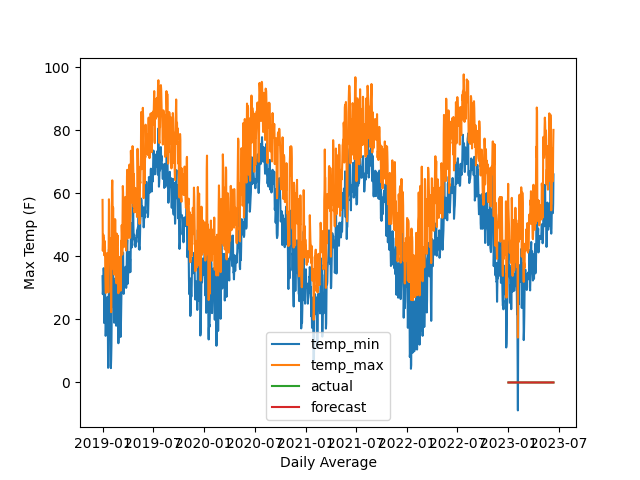

In [18]:
import matplotlib.pyplot as plt

y_sm_pred_df = pd.DataFrame(y_sm_pred, columns=y_train.columns).set_index(y_test.index).sort_index()
y_sm_test_df = pd.DataFrame(y_sm_test, columns=y_train.columns).set_index(y_test.index).sort_index()

plt.plot(y_sm_test_df, label='actual')
plt.plot(y_sm_pred_df, label='forecast')
plt.legend()
plt.show()

%matplot plt

In [19]:
endpoint_name = llearner_predictor.endpoint_name
print(endpoint_name)

linear-learner-2023-06-14-21-25-59-536


## (Optional) Reuse an existing estimator

In [20]:
from sagemaker import LinearLearnerPredictor

llearner_predictor = LinearLearnerPredictor(endpoint_name)
result = llearner_predictor.predict(x_test.values.astype('float32'))
y_sm_pred = [r.label["score"].float32_tensor.values[0] for r in result]
y_sm_test = y_test.values[:, 0].astype('float32')

print_metrics(y_sm_test, y_sm_pred)

RMSE: 0.0045
Variance score: -0.6487
Explained variance score: 0.4130
Forecast bias: 0.0036
sMAPE: 1.4582


# Clean up

In [ ]:
## Delete the endpoint 

## llearner_predictor.delete_endpoint()